#Autoregression AR (Box-Jenquis)

## 1 Libraries

In [ ]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

## 2 Database

In [ ]:
db=pd.read_csv("opsd_germany_daily.csv")
db

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


<Axes: >

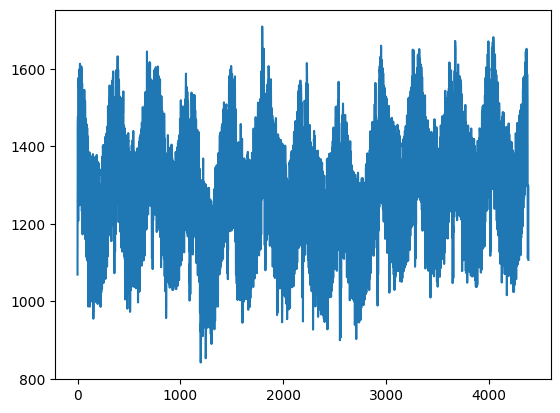

In [ ]:
db["Consumption"].plot()

## 3 Stationarity (the stability of the variable -mean and variance-)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_stationarity=adfuller(db["Consumption"],autolag="AIC")
print("P-Value: ", test_stationarity[1])

P-Value:  4.7440549018425884e-08


tsa - times series analysis

adfuller - **augmented Dickay and Fuller** its a test toknow if a variable or model is stationary

if the result is less than 0.005 it means that the data can be described or predycted by a regression model because is more stable

## 4 Partial autocorrelation funtion PAC

Now we are going to check and generate a analisys.

Toda serie tiene memoria, el proceso tiene un orden y la influencia que tiene el tiempo. Ahora se va aentender la dependencia del orden para poder crear un pronóstico

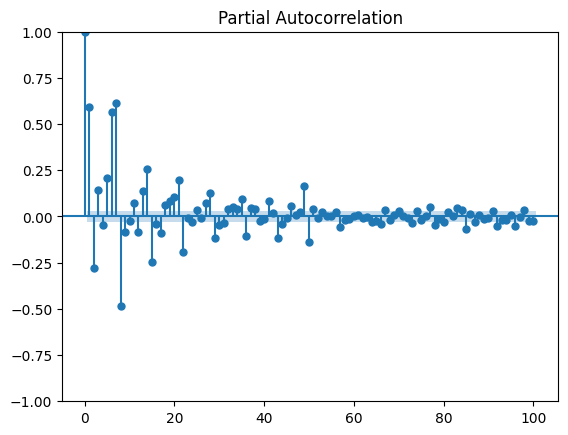

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["Consumption"], lags=100)

## 5 Autoregressive model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
modelAR=AutoReg(db["Consumption"],lags=8).fit()
print(modelAR.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4383
Model:                     AutoReg(8)   Log Likelihood              -24800.242
Method:               Conditional MLE   S.D. of innovations             70.084
Date:                Tue, 29 Aug 2023   AIC                          49620.484
Time:                        00:01:01   BIC                          49684.321
Sample:                             8   HQIC                         49643.010
                                 4383                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            120.8972     14.216      8.504      0.000      93.034     148.761
Consumption.L1     0.6457      0.013     48.965      0.000       0.620       0.671
Consumption.L2    -0.0965      0.011

## 6 Predictions

In [ ]:
pred=modelAR.predict(dynamic=False)
pred

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4378    1278.416282
4379    1345.669979
4380    1293.948181
4381    1216.888948
4382    1130.847583
Length: 4383, dtype: float64

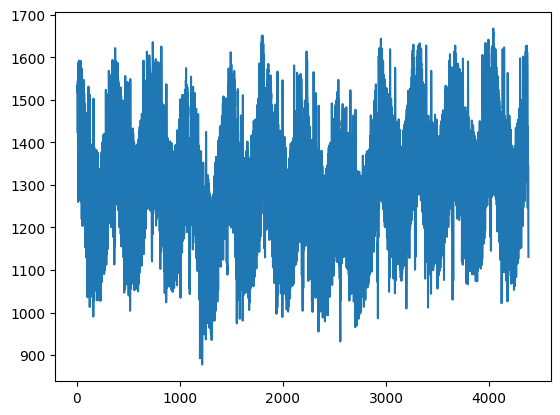

In [ ]:
plt.plot(pred)

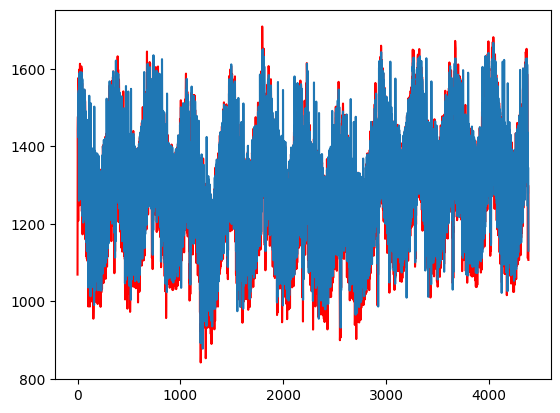

In [ ]:
from matplotlib import pyplot
pyplot.plot(db["Consumption"],color="red")
pyplot.plot(pred)